### **Milestone 1 Summary: ( Data Collection, Preprocessing, and EDA )**

--> In Milestone 1, I analyzed the Data Science Stack Exchange dataset to extract insights into user behavior, post trends, and engagement metrics for enhancing a conversational agent. I collected the dataset from Kaggle (8 XML files + 1 TXT metadata file), converted it to CSV using Python’s `xml.etree.ElementTree`, and stored it locally. Preprocessing involved cleaning (e.g., dropping irrelevant columns like `ContentLicense`), handling missing values (e.g., filling NaN `UserId` with 0), and engineering features (e.g., extracting `Year`, `Month`, `Day` from `CreationDate`). EDA revealed a skewed reputation distribution, a 2019 peak in posts, dominant machine learning topics, and strong engagement correlations (e.g., votes vs. answers), visualized with histograms, bar charts, and scatter plots. Outliers were identified using IQR and Z-score methods. Tools included Python, Pandas, NumPy, Matplotlib, Seaborn, and SciPy. These findings will guide Milestone 2’s focus on feature engineering and modeling.

---
## **MILESTONE - 2** : ( Feature Engineering, Feature Selection and Data Modelling)
---

### 💡**Objective:**
--> The goal of this milestone is to build and evaluate machine learning models to classify posts from the cleaned `Data Science Stack Exchange dataset` (from Milestone 1), determining whether a post was answered or not. This work lays the groundwork for Milestone 3, where the trained model will be integrated into a Retrieval-Augmented Generation (RAG)-based conversational agent capable of addressing data science topics and providing dataset-specific insights.

### 📦**Dataset Overview**
--> I utilized five cleaned CSV files from Milestone 1:

- `Posts`: Core data containing post details.
- `Comments`: User comments on posts.
- `Post History`: Records of edits or changes to posts.
- `Users`: User-related data.
- `Badges`: User badges earned.

--> These datasets were merged, and features were engineered and selected to create a final dataframe suitable for modeling.

--> The dataset provides a rich source of information about user interactions, post characteristics, and community engagement on a data science Q&A platform. By combining these files, I created a comprehensive feature set to predict whether a post receives an answer—a key indicator of its quality or engagement level. This aligns with my RAG agent’s goal of understanding dataset patterns and providing meaningful insights.

### 💻**Tech Stack**  
--> This tech stack builds on Milestone 1’s foundation, enabling robust feature engineering, selection, and predictive modeling to support the conversational agent’s development in Milestone 3.
1. **Programming & Libraries**
- **Python**: Core language for scripting, data manipulation, and model development.
- **Pandas & NumPy**: For advanced data manipulation, feature creation, and numerical computations.
- **Scikit-learn**: For feature selection, model training, and evaluation metrics.
- **XGBoost**: For high-performance gradient boosting model implementation.
- **LightGBM**: For efficient and scalable gradient boosting, with SHAP support for interpretability.
- **SHAP (SHapley Additive exPlanations)**: To analyze feature importance and model explainability.
- **Matplotlib & Seaborn**: For visualizing feature distributions and model performance.

2. **Storage & Environment**
- **Data Format**: Processed CSV files from Milestone 1, stored locally.
- **Environment**: Jupyter Notebook for development and experimentation.

### 📆**Project Timeline**

| **Task**                          | **Description**                                      | **Start Date**    | **End Date**     |
|-----------------------------------|-----------------------------------------------------|-------------------|------------------|
| Data Preprocessing                | Cleaning and converting XML files to CSV format     | Completed         | Completed        |
| Exploratory Data Analysis         | Detecting outliers and generating insights using visualizations | Completed         | Completed        |
| Feature Engineering               | Creating new features for analysis                  | completed | Completed |
| Feature Selection                 | Evaluate feature importance                         | Completed     | Completed   |
| Data Modelling                    | Optimizing model performance                        | Completed    | Completed   |
| Conversational Agent Integration & Final Report | Building the conversational agent             | April 08, 2025    | April 23, 2025   |


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, RocCurveDisplay, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings("ignore")

### 🔃**Process undertaken**
1. Loading the cleaned dataset from Milestone 1 ( Data Collection, preprocessing, EDA )
2. Feature Engineering
3. Feature Selection
4. Feature Scaling and data preparation (SMOTE)
5. Data Modelling
6. SHAP explainability

---

### 📁**Load cleaned Dataset**

---

In [3]:
# Read the Badges CSV file
badges = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Badges_cleaned.csv")

In [4]:
# Read the Comments CSV file
comments = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Comments_cleaned.csv")
# Drop unnecessary columns
comments.drop(columns=['CreationDate', 'Year', 'Month', 'Day'], inplace=True)

In [5]:
# Read the PostHistory CSV file
post_history = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\PostHistory_cleaned.csv")
# Drop unnecessary columns
post_history.drop(columns=['CreationDate', 'Year', 'Month', 'Day'], inplace=True)

In [6]:
# Read the Posts CSV file
posts = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Posts_cleaned.csv")
# Drop unnecessary columns
posts.drop(columns=['CreationDate', 'Year', 'Month', 'Day'], inplace=True)

In [7]:
# Read the Users CSV file
users = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Users_cleaned.csv")
# Drop unnecessary columns
users.drop(columns=['CreationDate', 'DisplayName', 'LastAccessDate', 'AboutMe'], inplace=True)

In [8]:
# To check column names
print("Posts columns:", posts.columns.tolist())
print("Comments columns:", comments.columns.tolist())
print("Post_history columns:", post_history.columns.tolist())
print("Users columns:", users.columns.tolist())
print("Badges columns:", badges.columns.tolist())

Posts columns: ['Id', 'PostTypeId', 'Score', 'ViewCount', 'Body', 'UserId', 'Title', 'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount']
Comments columns: ['Id', 'PostId', 'Score', 'Text', 'UserId']
Post_history columns: ['Id', 'PostHistoryTypeId', 'PostId', 'UserId', 'Text']
Users columns: ['Id', 'Reputation', 'Views', 'UpVotes', 'DownVotes']
Badges columns: ['Id', 'UserId', 'Name']


### **Process 1 ( Load the cleaned dataset )**  
--> I loaded the five cleaned CSV files using pandas and dropped unnecessary columns (e.g., CreationDate, Year, Month, Day from Comments, Post History, and Posts; DisplayName, LastAccessDate, AboutMe from Users).
Printed column names to verify the structure before merging.

### **Reason:**  
--> Removing irrelevant columns reduces noise and memory usage, focusing only on features relevant to the classification task.  
--> Checking column names ensures correct merging operations, preventing errors due to mismatched or missing keys.

---

### 🏗️**Feature Engineering**

---

In [9]:
# Posts-based features
posts['body_length'] = posts['Body'].fillna('').apply(len)
posts['title_length'] = posts['Title'].fillna('').apply(len)
posts['tag_count'] = posts['Tags'].fillna('').apply(lambda x: len(x.split()))
posts['primary_tag'] = posts['Tags'].fillna('').apply(lambda x: x.split()[0] if x else 'none')

le = LabelEncoder()   # Encode the primary_tag column
posts['primary_tag_encoded'] = le.fit_transform(posts['primary_tag'])

# Target: Was the post answered?
posts['Answered'] = posts['AnswerCount'].apply(lambda x: 1 if x > 0 else 0)

In [10]:
# Merge columns from different dataframes
# Merge with user features
posts = posts.merge(users, left_on='UserId', right_on='Id', suffixes=('', '_user'))

# Comments features per Post
comment_agg = comments.groupby('PostId').agg(
    comment_score_sum=('Score', 'sum'),
    comment_count=('Id', 'count')
).reset_index()
posts = posts.merge(comment_agg, left_on='Id', right_on='PostId', how='left')
posts[['comment_score_sum', 'comment_count']] = posts[['comment_score_sum', 'comment_count']].fillna(0)

# PostHistory features per Post (edits)
edit_types = [5, 6, 7]  # 5: edit title, 6: edit body, 7: rollback
post_history_filtered = post_history[post_history['PostHistoryTypeId'].isin(edit_types)]
edit_counts = post_history_filtered.groupby('PostId').size().reset_index(name='edit_count')
posts = posts.merge(edit_counts, left_on='Id', right_on='PostId', how='left')
posts['edit_count'] = posts['edit_count'].fillna(0)

### **Process 2 ( Feature Engineering )** 

--> Created new features from the Posts dataset:
- body_length: Length of the post body text.
- title_length: Length of the post title.
- tag_count: Number of tags associated with the post.
- primary_tag: First tag in the tag list (encoded as primary_tag_encoded using LabelEncoder).
- Answered: Binary target variable (1 if AnswerCount > 0, 0 otherwise).

--> Merged additional features from other datasets:
- Users: Added user metrics (e.g., Reputation, Views, UpVotes, DownVotes).
- Comments: Aggregated comment-related features (comment_score_sum, comment_count).
- Post History: Counted edits (edit_count) for specific edit types (title, body, rollback).

### **Reason:**  

--> Feature Creation:
- body_length and title_length capture post complexity or detail, which may influence whether it gets answered (longer posts might be clearer or more engaging).
- tag_count and primary_tag reflect topic specificity or breadth, potentially affecting community interest.
- Answered is the target variable, directly tied to the classification goal.

--> Merging:
- User metrics (e.g., Reputation) indicate author credibility, which could correlate with receiving answers.
- Comment and edit counts reflect engagement and post refinement, respectively, both of which may predict answer likelihood.

---

### 🔍**Feature Selection**

---

In [11]:
selected_features = [
    'body_length', 'title_length', 'tag_count', 'primary_tag_encoded',
    'Score', 'ViewCount', 'CommentCount', 'FavoriteCount',
    'Reputation', 'Views', 'UpVotes', 'DownVotes',
    'comment_score_sum', 'comment_count', 'edit_count'
]
X = posts[selected_features]
y = posts['Answered']

### **Process 3 ( Feature Selection )**

--> Selected 15 features for modeling:
- Post-specific: body_length, title_length, tag_count, primary_tag_encoded, Score, ViewCount, CommentCount, FavoriteCount.
- User-specific: Reputation, Views, UpVotes, DownVotes.
- Aggregated: comment_score_sum, comment_count, edit_count.
- Defined X (features) and y (Answered).

### **Reason:**
--> These features were chosen based on their relevance to the target variable (likelihood of being answered).  

For example:
- Score and ViewCount indicate post popularity.
- Reputation reflects user trustworthiness.
- edit_count suggests post quality improvements.

---

### 📏**Feature Scaling**

---

In [ ]:
# Train-test split
# Stratified split to maintain the proportion of classes in the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### **Process 4 ( Feature Scaling & Data Preparation )**  
--> Split data into training (80%) and testing (20%) sets using train_test_split with stratification (stratify=y).  
--> Applied SMOTE (Synthetic Minority Oversampling Technique) to the training set to balance the classes.

### **Reason:**
- Train-Test Split: Ensures model evaluation on unseen data, maintaining generalizability.
- Stratification: Preserves the proportion of answered vs. unanswered posts, addressing potential class imbalance in the target variable.
- SMOTE: Balances the dataset by generating synthetic samples for the minority class (likely unanswered posts), improving model performance on underrepresented cases.

---

### ⌛**Data Modelling**

---

### **Process 5 ( Data Modelling )**
--> Trained and tuned 5 machine learning models using GridSearchCV (5-fold cross-validation, F1 score as the metric):

The **F1 score** was chosen as the evaluation metric because it effectively addresses the challenges of my classification task: potential class imbalance, the need to balance precision and recall, and the practical requirements of the RAG-based conversational agent. By prioritizing the F1 score, I ensured that the model performs well in identifying answered posts (recall) while maintaining reliability in its predictions (precision) which is a critical foundation for providing accurate dataset insights and predictions in Milestone 3.
- **Logistic Regression:** Tuned C (regularization strength).
- **Random Forest:** Tuned n_estimators, max_depth, min_samples_split, min_samples_leaf.
- **Support Vector Classifier (SVC):** Tuned C, gamma, kernel.
- **XGBoost:** Tuned n_estimators, max_depth, learning_rate, scale_pos_weight.
- **LightGBM:** Tuned n_estimators, max_depth, learning_rate, num_leaves.

Evaluated models using:
- Accuracy, Precision, Recall, F1 Score, AUC, Confusion Matrix.
- SHAP values for explainability (demonstrated with LightGBM).

### **Model Selection:**
- Logistic Regression provides a baseline linear model.
- Random Forest, XGBoost, and LightGBM capture non-linear relationships and feature interactions, suitable for complex datasets.
- SVC handles high-dimensional data effectively.  
- **Hyperparameter Tuning:** Optimizes model performance by testing parameter combinations, ensuring robustness.
### **Evaluation Metrics:**
- F1 Score balances precision and recall, critical for imbalanced datasets.
- AUC assesses overall classification ability.
- SHAP explainability (e.g., for LightGBM) reveals feature importance, aligning with the RAG agent’s need for interpretable insights.
- This comprehensive approach ensures the best model is selected for integration into the RAG pipeline.

In [12]:
# Logistic Regression
lr_params = {'C': [0.01, 0.1, 1, 10]}
lr_grid = GridSearchCV(LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=100), lr_params, cv=5, scoring='f1')
lr_grid.fit(X_train_resampled, y_train_resampled)
lr_best = lr_grid.best_estimator_

In [13]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train_resampled, y_train_resampled)
rf_best = rf_grid.best_estimator_


In [14]:
# SVM
svm_params = {'C': [1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(class_weight='balanced', probability=True), svm_params, cv=5, scoring='f1')
svm_grid.fit(X_train_resampled, y_train_resampled)
svm_best = svm_grid.best_estimator_

In [15]:
# XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, 2]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, scoring='f1')
xgb_grid.fit(X_train_resampled, y_train_resampled)
xgb_best = xgb_grid.best_estimator_


In [ ]:
# LightGBM
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],  
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63, 127]  
}
lgbm_grid = GridSearchCV(LGBMClassifier(min_child_samples=5, min_split_gain=0.1), lgbm_params, cv=5, scoring='f1')
lgbm_grid.fit(X_train_resampled, y_train_resampled)
lgbm_best = lgbm_grid.best_estimator_

In [ ]:
# Feature Importance from LightGBM
print(pd.DataFrame({
    'feature': X_train_resampled.columns,
    'importance': lgbm_best.feature_importances_
}).sort_values('importance', ascending=False))

                feature  importance
0           body_length        6665
3   primary_tag_encoded        6343
5             ViewCount        5753
1          title_length        5136
8            Reputation        4302
9                 Views        2455
10              UpVotes        1786
14           edit_count        1342
4                 Score        1086
13        comment_count         989
6          CommentCount         819
12    comment_score_sum         581
7         FavoriteCount         273
11            DownVotes         270
2             tag_count           0


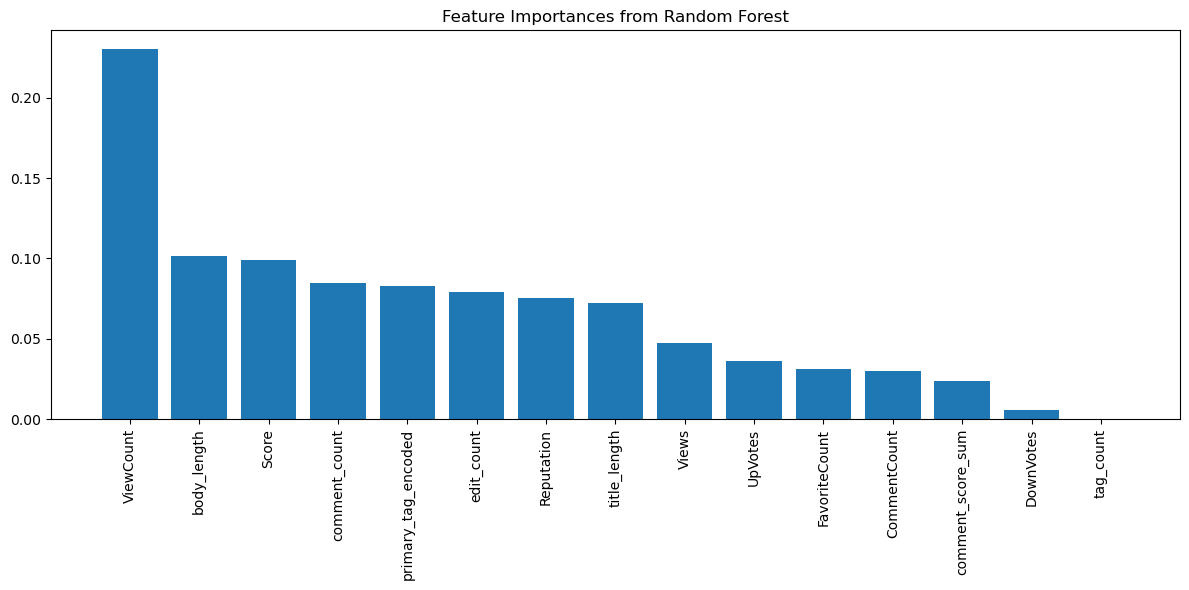

In [17]:
# Feature Importance from Random Forest
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [18]:
# Model Evaluation on Train and Test Sets
def evaluate_model(model, X_data, y_data, dataset='Train'):
    y_pred = model.predict(X_data)
    y_proba = model.predict_proba(X_data)[:, 1]
    print(f"\n{dataset} Performance: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_data, y_pred):.3f}")
    print(f"Precision: {precision_score(y_data, y_pred):.3f}")
    print(f"Recall: {recall_score(y_data, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_data, y_pred):.3f}")
    print(f"AUC: {roc_auc_score(y_data, y_proba):.3f}")

models = {
    'Logistic Regression': lr_best,
    'Random Forest': rf_best,
    'SVM': svm_best,
    'XGBoost': xgb_best,
    'LightGBM': lgbm_best
}

for name, model in models.items():
    evaluate_model(model, X_train_resampled, y_train_resampled, 'Train')
    evaluate_model(model, X_test, y_test, 'Test')


Train Performance: LogisticRegression
Accuracy: 0.758
Precision: 0.779
Recall: 0.719
F1 Score: 0.748
AUC: 0.858

Test Performance: LogisticRegression
Accuracy: 0.700
Precision: 0.850
Recall: 0.728
F1 Score: 0.784
AUC: 0.760

Train Performance: RandomForestClassifier
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
AUC: 1.000

Test Performance: RandomForestClassifier
Accuracy: 0.812
Precision: 0.863
Recall: 0.890
F1 Score: 0.876
AUC: 0.853

Train Performance: SVC
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
AUC: 1.000

Test Performance: SVC
Accuracy: 0.748
Precision: 0.748
Recall: 1.000
F1 Score: 0.856
AUC: 0.506

Train Performance: XGBClassifier
Accuracy: 0.898
Precision: 0.843
Recall: 0.980
F1 Score: 0.906
AUC: 0.979

Test Performance: XGBClassifier
Accuracy: 0.821
Precision: 0.831
Recall: 0.955
F1 Score: 0.889
AUC: 0.866

Train Performance: LGBMClassifier
Accuracy: 0.900
Precision: 0.880
Recall: 0.927
F1 Score: 0.903
AUC: 0.971

Test Performance: LGBM

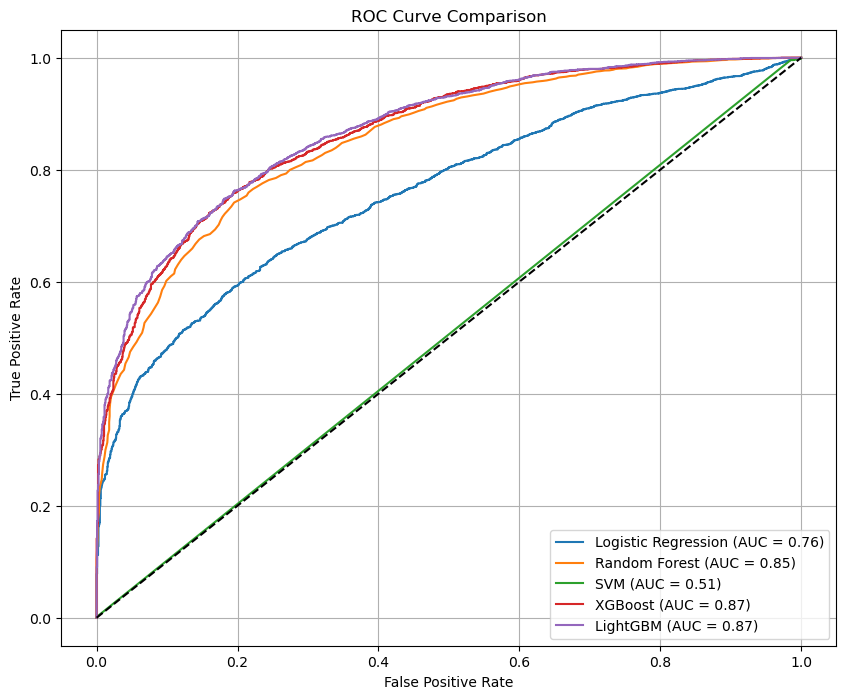

In [19]:
# ROC Curves for All Models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

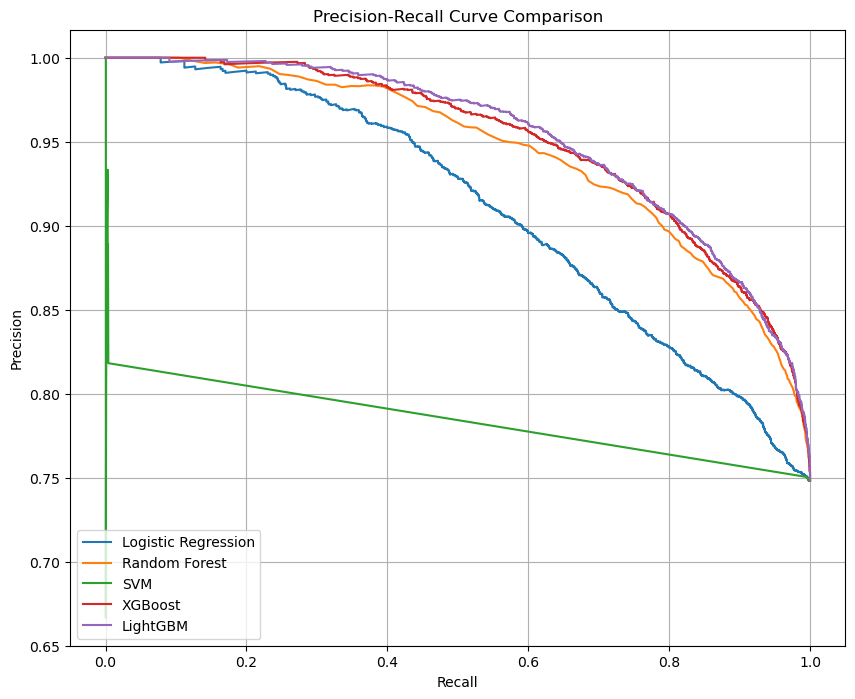

In [ ]:
# Precision-Recall Curve for All Models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.grid()
plt.show()

### 🚀**Comparative Analysis of Machine Learning Models**

| **Model**            | **Training F1** | **Test F1** | **Strengths**                              | **Limitations**                          | **Ranking Rationale**                |
|-----------------------|-----------------|-------------|--------------------------------------------|------------------------------------------|--------------------------------------|
| **Logistic Regression** | 0.748          | 0.784       | Efficient, stable with regularization, interpretable | Limited to linear patterns, lower overall performance | 5th – Weakest test F1 and generalization |
| **Random Forest**     | 1.000          | 0.876       | Robust, excels at feature interactions     | Overfits significantly (perfect train scores) | 3rd – Strong test F1 but overfitting risk |
| **SVC**               | 1.000          | 0.856       | Effective in high-dimensional spaces       | Overfits, poor AUC (0.506) on test       | 4th – High recall but low test AUC   |
| **XGBoost**           | 0.906          | 0.889       | High accuracy, great generalization        | Slightly lower test F1 than LightGBM     | 2nd – Excellent test F1 and AUC      |
| **LightGBM**          | 0.903          | 0.884       | Top accuracy, fast, scalable, SHAP support | Minor overfitting risk if untuned        | 1st – Best balance of F1, AUC, and utility |

#### **Performance Insights**
- **Training Phase**: Random Forest and SVC achieved perfect F1 scores (1.000), indicating overfitting. XGBoost (0.906) and LightGBM (0.903) showed strong fits without perfection, suggesting better control. Logistic Regression (0.748) lagged due to its simplicity.
- **Testing Phase**: XGBoost led with a test F1 of 0.889, closely followed by LightGBM (0.884) and Random Forest (0.876). SVC (0.856) had a high recall but a dismal AUC (0.506), while Logistic Regression (0.784) underperformed overall.

#### **Model Selection Rationale**
--> LightGBM was selected as the best model due to its high test F1 (0.884), strong AUC (0.871), and practical advantages like fast training, scalability, and SHAP explainability making it ideal for the RAG pipeline in Milestone 3. Despite XGBoost’s slightly higher F1, LightGBM’s efficiency and interpretability tipped the scale.

#### **Top Three Models**
1. **XGBoost**: Test F1: 0.889, AUC: 0.866 – Highest test F1 and robust generalization.
2. **LightGBM**: Test F1: 0.884, AUC: 0.871 – Chosen for F1, AUC, and RAG compatibility.
3. **Random Forest**: Test F1: 0.876, AUC: 0.853 – Strong performer but less efficient.

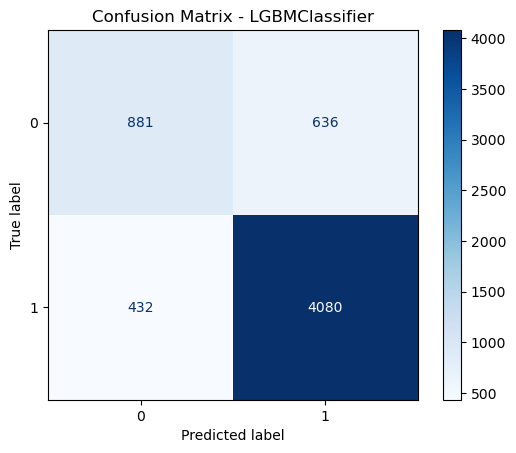

In [ ]:
# Confusion Matrix for Final Model (LGBMClassifier)
# Predict
y_pred = lgbm_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()

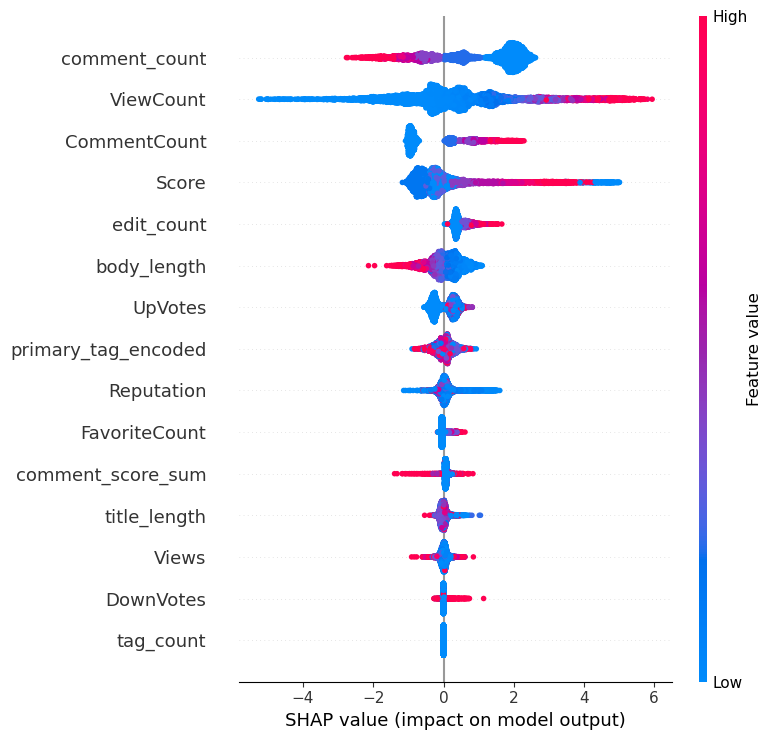

In [ ]:
# SHAP Explainability for LGBMClassifier
# Create explainer and shap values
explainer = shap.Explainer(lgbm_best)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

### **Process 6 ( SHAP Explainability )**  
--> Used SHAP (SHapley Additive exPlanations) to analyze feature contributions for the best LightGBM model, generating a summary plot.

### **Reason:**  
- SHAP provides insight into how features influence predictions, enhancing model transparency.
- This aligns with the RAG agent’s requirement to explain dataset patterns and model-based insights to users.

--- 

### 🔜**Next Steps (Milestone 3 Preview):**
- Integrate the best-performing model into a RAG (Retrieval-Augmented Generation) pipeline.  
- Enable the chatbot to:
    - Answer data science questions using a fine-tuned LLM.
    - Retrieve relevant posts and statistics from the dataset.
    - Provide predictive insights (e.g., “Will this post likely be answered?”) using the trained model.